# Αναγνώριση Προτύπων
# Εργασία 3

**Ζαχάρη Βάια**

58161

# **ΆΣΚΗΣΗ 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/ergasia3protupa/seeds_dataset.txt','r') as file:
  data = file.read()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**A) Απεικόνιση Πίνακα Αποστάσεων**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import rand_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize



# Φόρτωση του dataset
file_path = '/content/drive/MyDrive/ergasia3protupa/seeds_dataset.txt'

seeds_data = pd.read_csv(file_path, delim_whitespace=True, header=None)

Για να αναλύσουμε ποιες κλάσεις είναι ευκολότερο να διαχωριστούν, θα πρέπει να εξετάσουμε τη διασπορά των αποστάσεων εντός και μεταξύ των κλάσεων.

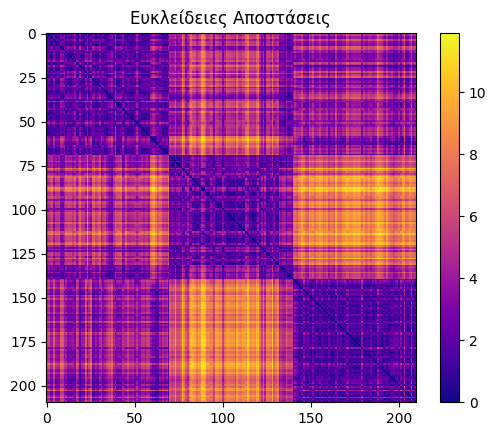

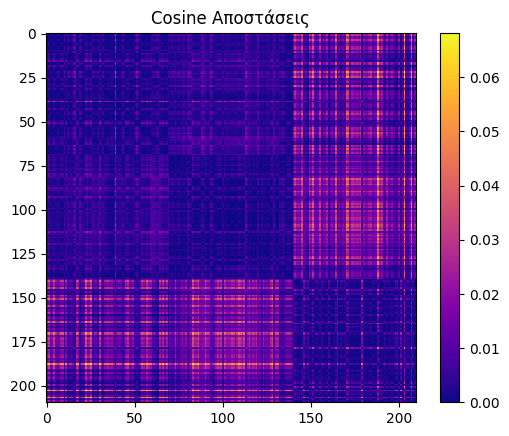

In [ ]:
# Αφαιρούμε τη στήλη των κλάσεων και αποθηκεύουμε τα χαρακτηριστικά
features = seeds_data.drop(seeds_data.columns[-1], axis=1)

# Υπολογίζουμε τις Ευκλείδειες και cosine αποστάσεις
euclidean_distances = pdist(features, 'euclidean')
cosine_distances = pdist(features, 'cosine')

# Μετατρέπουμε τις αποστάσεις σε τετραγωνικούς πίνακες
euclidean_distances_matrix = squareform(euclidean_distances)
cosine_distances_matrix = squareform(cosine_distances)

# Απεικόνιση του τετραγωνικού πίνακα των Ευκλείδειων αποστάσεων
plt.imshow(euclidean_distances_matrix, cmap='plasma', interpolation='nearest')
plt.title("Ευκλείδειες Αποστάσεις")
plt.colorbar()
plt.show()

# Απεικόνιση του τετραγωνικού πίνακα των Cosine αποστάσεων
plt.imshow(cosine_distances_matrix, cmap='plasma', interpolation='nearest')
plt.title("Cosine Αποστάσεις")
plt.colorbar()
plt.show()

H οπτικοποίηση μέσω των παραπάνω διαγραμμάτων είναι χρήσιμη για να εξετάσουμε αν υπάρχουν ομοιότητες ή σημαντικές διαφορές στις αποστάσεις εντός και μεταξύ των κλάσεων των δειγμάτων.

**Ευκλείδειες Αποστάσεις:**

Οι τιμές των Ευκλείδειων αποστάσεων εμφανίζονται πιο διακριτικά και εκτείνονται σε ευρύτερο εύρος, όπως φαίνεται από την κλίμακα χρωμάτων.
Εμφανίζονται τρία κυρίαρχα μπλοκ στην διαγώνιο του πίνακα,όπου το καθένα σημαίνει μία κλάση. Αυτό σημαίνει ότι τα δείγματα εντός κάθε κλάσης είναι πιο κοντά μεταξύ τους σε σχέση με δείγματα από άλλες κλάσεις.
Τα πιο ανοιχτόχρωμα μπλοκ εκτός της διαγωνίου δείχνουν τις αποστάσεις μεταξύ των διαφορετικών κλάσεων, δηλαδή μεγαλύτερη απόσταση μεταξύ των δειγμάτων από διαφορετικές κλάσεις.

**Cosine Αποστάσεις:**

Οι τιμές των cosine αποστάσεων φαίνεται να βρίσκονται κοντά στο μηδέν, όπως δείχνει η κλίμακα χρωμάτων.
Υπάρχουν ξεκάθαρα ομάδες που παρουσιάζουν χαμηλές αποστάσεις (σκούρα χρώματα), που σημαίνει ότι είναι ομάδες δεδομένων με μεγάλη ομοιότητα.
Η ομοιομορφία των μπλοκ δείχνει ότι η cosine μετρική διαχωρίζει συγκεκριμένες ομάδες δεδομένων από τις υπόλοιπες.

Γενικά, οι εικόνες δείχνουν ότι υπάρχει συνοχή εντός των κλάσεων και διαχωρισμός μεταξύ τους, και στην Ευκλείδεια και στην Cosine μετρική. Όμως, τα τα μπλοκ στις Ευκλείδειες αποστάσεις φαίνονται πιο συγκεκριμένα και έντονα, οπότε έχει μια καλύτερη διαχωριστική ικανότητα.

**Ευκλείδια μετρική**

In [ ]:
# Ετικέτες της κλάσης
class_labels = seeds_data[seeds_data.columns[-1]].values

# Πίνακες αποστάσεων
# Υπολογίζουμε το μέγεθος του τετραγωνικού πίνακα
n_samples = seeds_data.shape[0]  # Αριθμός δειγμάτων
euclidean_distances_matrix = np.zeros((n_samples, n_samples))

# Συμπληρώνουμε τον τετραγωνικό πίνακα με τις αποστάσεις
idx = 0
for i in range(n_samples):
    for j in range(i+1, n_samples):
        euclidean_distances_matrix[i, j] = euclidean_distances[idx]
        euclidean_distances_matrix[j, i] = euclidean_distances[idx]
        idx += 1


# Χωρίζουμε τις αποστάσεις σε εσωτερικές και μεταξύ των κλάσεων και θα υπολογίσουμε τις μέσες τιμές τους.
# Αρχικοποίηση λιστών για τις μέσες τιμές αποστάσεων.
euclidean_within_class_mean = []
euclidean_between_class_mean = []

# Διατρέχουμε όλες τις μοναδικές τιμές των ετικετών των κλάσεων
for class_label in np.unique(class_labels):
    # Βρίσκουμε τα δείγματα που ανήκουν στην τρέχουσα κλάση
    class_samples = euclidean_distances_matrix[class_labels == class_label]

    # Υπολογίζουμε τη μέση απόσταση εντός αυτής της κλάσης
    mean_within = np.mean(class_samples[:, class_labels == class_label])
    euclidean_within_class_mean.append(mean_within)

    # Υπολογίζουμε τη μέση απόσταση μεταξύ αυτής της κλάσης και των άλλων
    mean_between = np.mean(class_samples[:, class_labels != class_label])
    euclidean_between_class_mean.append(mean_between)


# Εμφάνιση των μέσων τιμών αποστάσεων
print("Μέσες Ευκλείδειες αποστάσεις εντός κάθε κλάσης:", euclidean_within_class_mean)
print("Μέσες Ευκλείδειες αποστάσεις μεταξύ των κλάσεων:", euclidean_between_class_mean)


Μέσες Ευκλείδειες αποστάσεις εντός κάθε κλάσης: [2.2666150199918182, 2.490235318520607, 1.9280435765010842]
Μέσες Ευκλείδειες αποστάσεις μεταξύ των κλάσεων: [4.490687701768639, 6.301535589252101, 5.743147602565579]


Μέσες αποστάσεις εντός κάθε κλάσης:

Κλάση 1: 2.27

Κλάση 2: 2.49

Κλάση 3: 1.93

Μέσες αποστάσεις μεταξύ κλάσεων:

Από Κλάση 1 προς άλλες κλάσεις: 4.49

Από Κλάση 2 προς άλλες κλάσεις: 6.30

Από Κλάση 3 προς άλλες κλάσεις: 5.74

Αυτά τα αποτελέσματα δείχνουν πως οι κλάσεις διαχωρίζονται καλύτερα μεταξύ τους από ό,τι εντός τους.Η κλάση 2 να παρουσιάζει την υψηλότερη μέση απόσταση μεταξύ των κλάσεων, οπότε αυτή έχει τη μεγαλύτερη διακριτικότητα σε σχέση με τις άλλες κλάσεις.

Γενικά ο κανόνας είναι ότι θέλουμε μικρό μέσο όρο στις αποστάσεις εντός τους, έτσι ώστε να είναι πιο συμπαγείς και να απέχουν λίγο από το κέντρο της κλάσης και μεγάλο μέσο όρο στις αποστάσεις μεταξύ των κλάσεων ,έτσι ώστε οι κλάσεις μεταξύ τους να είναι απομακρυσμένες η μία από την άλλη.

**Cosine μετρική**

In [ ]:
# Υπολογισμός των μέσων τιμών αποστάσεων εντός και μεταξύ των κλάσεων για Cosine απόσταση
cosine_within_class_mean = []
cosine_between_class_mean = []

# Πινάκες αποστάσεων για Cosine απόσταση σε τετραγωνική μορφή
cosine_distances_matrix = np.zeros((n_samples, n_samples))

# Συμπληρώνουμε τον τετραγωνικό πίνακα με  τις αποστάσεις
idx = 0
for i in range(n_samples):
    for j in range(i+1, n_samples):
        cosine_distances_matrix[i, j] = cosine_distances[idx]
        cosine_distances_matrix[j, i] = cosine_distances[idx]
        idx += 1

# Διατρέχουμε όλες τις μοναδικές τιμές των ετικετών των κλάσεων
for class_label in np.unique(class_labels):
    # Βρίσκουμε τα δείγματα που ανήκουν στην τρέχουσα κλάση
    class_samples = cosine_distances_matrix[class_labels == class_label]

    # Υπολογίζουμε τη μέση απόσταση εντός αυτής της κλάσης
    mean_within = np.mean(class_samples[:, class_labels == class_label])
    cosine_within_class_mean.append(mean_within)

    # Υπολογίζουμε τη μέση απόσταση μεταξύ αυτής της κλάσης και των άλλων
    mean_between = np.mean(class_samples[:, class_labels != class_label])
    cosine_between_class_mean.append(mean_between)


# Εμφάνιση των αποτελεσμάτων
print("Μέσες Cosine αποστάσεις εντός κάθε κλάσης:", cosine_within_class_mean)
print("Μέσες Cosine αποστάσεις μεταξύ των κλάσεων:", cosine_between_class_mean)

Μέσες Cosine αποστάσεις εντός κάθε κλάσης: [0.0033957875499959394, 0.0025190685431320465, 0.004475709126686914]
Μέσες Cosine αποστάσεις μεταξύ των κλάσεων: [0.008908757542021986, 0.010293024354333439, 0.014223270611936567]


Μέσες αποστάσεις εντός κάθε κλάσης:

Κλάση 1: 0.00340

Κλάση 2: 0.00252

Κλάση 3: 0.00448

Μέσες αποστάσεις μεταξύ κλάσεων:

Από Κλάση 1 προς άλλες κλάσεις: 0.00891

Από Κλάση 2 προς άλλες κλάσεις: 0.01029

Από Κλάση 3 προς άλλες κλάσεις: 0.01422

Φαίνεται ότι οι μέσες αποστάσεις μεταξύ κλάσεων είναι υψηλότερες από τις μέσες αποστάσεις εντός των κλάσεων για όλες τις κλάσεις. Αυτό σημαίνει ότι υπάρχει μια σχετικά καλή διαχωριστική ικανότητα μεταξύ των κλάσεων. Η κλάση 3 είναι  πιο διακριτική σε σχέση με τις άλλες.

Σύμφωνα με τα αποτελέσματα συμπεραίνουμε ότι οι κλάσεις είναι καλύτερα διαχωρισμένες μεταξύ τους από ό,τι εντός τους, ειδικά με την **Ευκλείδεια απόσταση.** Αυτό είναι συμβατό με την κλασική θεωρία του k-means. Επίσης τα αποτελέσματα ταυτίζονται με αυτά που θεωρήσαμε από την απεικόνηση των αποστάσεων.

**Β)**

Ο αλγόριθμος **k-means** αναζητά το κέντρο κάθε ομάδας (cluster) και αντιστοιχίζει κάθε δείγμα στην πλησιέστερη ομάδα με βάση την Τετραγωνική Ευκλείδεια απόσταση.

To **Silhouette Coefficient** είναι ένα μέτρο που αξιολογεί πόσο καλά τα δείγματα έχουν ομαδοποιηθεί, υπολογίζοντας την ομοιογένεια εντός των κλάσεων σε σχέση με την διαχωριστική τους ικανότητα. Ένας υψηλός δείκτης Silhouette δείχνει ότι τα δείγματα εντός μιας κλάσης είναι συμπαγή και ξεχωριστά από τα δείγματα άλλων κλάσεων.

Για κάθε δείγμα i, το  Silhouette Coefficient υπολογίζεται ως εξής:

S(i)=(b(i)−a(i))/max{a(i),b(i)}


Όπου:

a(i) είναι η μέση απόσταση του δείγματος i από όλα τα άλλα δείγματα στην ίδια ομάδα.

b(i) είναι η μικρότερη μέση απόσταση του δείγματος i από τα δείγματα σε μια άλλη ομάδα, δηλαδή η απόσταση του δείγματος i από την πλησιέστερη ομάδα στην οποία δεν ανήκει.

Το Silhouette Coefficient για ένα δείγμα μπορεί να πάρει μια τιμή μεταξύ -1 και 1, όπου:

Μια τιμή κοντά στο 1 υποδεικνύει ότι το δείγμα βρίσκεται καλά μέσα στην ομάδα του και μακριά από άλλες ομάδες.

Μια τιμή κοντά στο 0 υποδεικνύει ότι το δείγμα βρίσκεται σε έναν οριακό τομέα μεταξύ δύο ομάδων.

Μια τιμή κοντά στο -1 υποδεικνύει ότι το δείγμα έχει τοποθετηθεί στη λάθος ομάδα.

Silhouette Scores: [0.7098621844742572, 0.663217436846624, 0.5943133167452762, 0.5359937782940177, 0.5487976758434984, 0.5463033288113778, 0.5377581330823062, 0.5278688881068075, 0.48973636886826827]


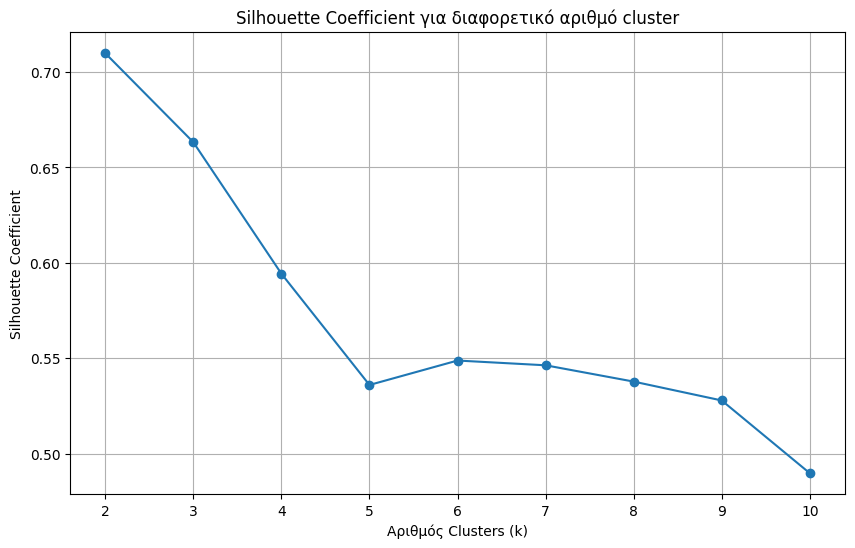

In [ ]:
# Υπολογισμός του Silhouette Coefficient για διάφορες τιμές του k (από 2 έως 10)
silhouette_scores = []


# Επανάληψη για τιμές του k από 2 έως 10
for k in range(2, 11):
    # Δημιουργία του μοντέλου KMeans με k clusters
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)

    # Εφαρμογή του μοντέλου KMeans στα δεδομένα
    kmeans.fit(features)

    # Υπολογισμός του Silhouette score για το τρέχον k
    labels = kmeans.labels_
    # metric='sqeuclidean', γιατί στο kmeans η μετρική είναι άθροισμα τετραγώνου
    score = silhouette_score(features,labels,metric='sqeuclidean')

    # Προσθήκη του score στη λίστα
    silhouette_scores.append(score)

# Τυπώνουμε τα αποτελέσματα
print("Silhouette Scores:", silhouette_scores)


# Δημιουργία διαγράμματος για τις τιμές του Silhouette Coefficient
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient για διαφορετικό αριθμό cluster')
plt.xlabel('Αριθμός Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


Στο διάγραμμα παρουσιάζονται οι τιμές του Silhouette Coefficient για διάφορες τιμές του k (από 2 έως 10) όταν εφαρμόζεται ο αλγόριθμος k-means στα δεδομένα.

Σύμφωνα με το διάγραμμα η υψηλότερη τιμή του Silhouette Coefficient έιναι όταν k=2, πράγμα που υποδηλώνει ότι η ομαδοποίηση σε δύο κλάσεις παρέχει τον πιο συμπαγή και ξεχωριστό διαχωρισμό των δεδομένων στο συγκεκριμένο dataset.

Το Silhouette Coefficient έδειξε ότι η καλύτερη τιμή για τον αριθμό των κλάσεων είναι 2, με βάση την Ευκλείδεια απόσταση. Η συνεχής μείωση του Silhouette Coefficient συμβαίνει γιατί όταν προστίθενται κλάσεις μπορεί να δημιουργούν υπερβολικά λεπτομερείς ή ανεπαρκώς διαχωρισμένες ομάδες, οι οποίες δεν αντανακλούν τη φυσική δομή των δεδομένων.

**Γ)**

Η κανονικοποίηση των δεδομένων εφαρμόζεται για να διασφαλιστεί ότι κάθε διάνυσμα χαρακτηριστικών έχει μοναδιαίο μήκος, επιτρέποντας τη σύγκριση των διανυσμάτων με βάση τις γωνίες μεταξύ τους μέσω της cosine μετρικής. Έτσι, οι μετρήσεις δεν επηρεάζονται από την αρχική κλίμακα των δεδομένων.

Silhouette Scores: [0.6660530128155293, 0.6829944590829405, 0.6074072084820593, 0.5500811608646137, 0.4523234455531807, 0.4519034680477711, 0.4590197833525768, 0.45682893640760025, 0.43562800524363887]


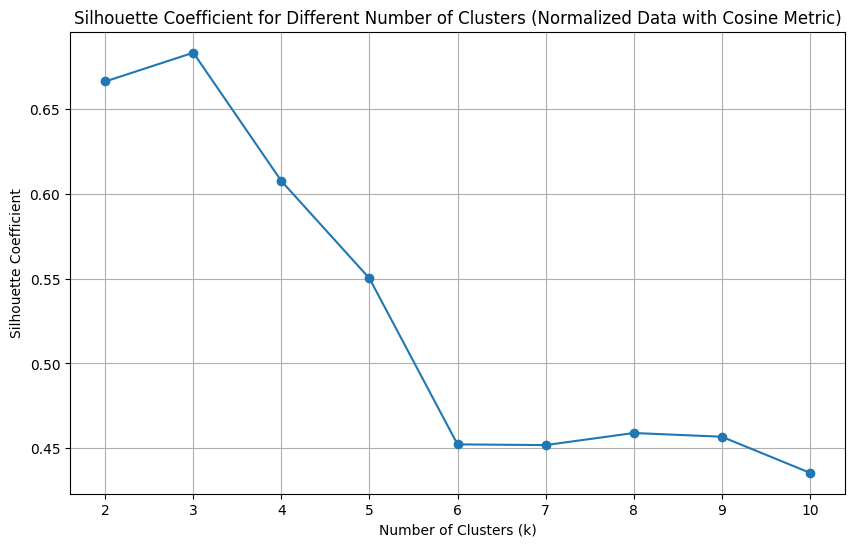

In [ ]:
# Δημιουργία ενός αντικειμένου StandardScaler
scaler = StandardScaler()

# Κανονικοποίηση των δεδομένων ώστε να έχουν μηδενική μέση τιμή και μοναδιαία διακύμανση
seeds_features_normalized = scaler.fit_transform(features)
#Ο KMeans δεν υποστηρίζει τη παράμετρο metric = cosine.
# Kανονικοποιούμε όλα τα δείγματα με βάση την απόσταση τους γιατί δεν μπορούμε να χρησιμοποίησουμε τη μετρική.
# Θα τα προβάλουμε όλα στο μοναδιαίο κύκλο.
length= np.sqrt((seeds_features_normalized**2).sum(axis = 1))[:,None]
seeds_features_normalized_new = seeds_features_normalized/length


# Υπολογισμός του Silhouette Coefficient για διάφορες τιμές του k (από 2 έως 10)
silhouette_scores_normalized = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(seeds_features_normalized_new)
    labels = kmeans.labels_
    score = silhouette_score(seeds_features_normalized_new, labels, metric = 'cosine')
    silhouette_scores_normalized.append(score)

print("Silhouette Scores:",silhouette_scores_normalized)
# Δημιουργία νέου διαγράμματος για τις τιμές του Silhouette Coefficient
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_normalized, marker='o')
plt.title('Silhouette Coefficient for Different Number of Clusters (Normalized Data with Cosine Metric)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

Βάση του διαγράμματος συμπεραίνουμε ότι η τιμή του Silhouette Coefficient είναι υψηλότερη για k=3, πράγμα που υποδηλώνει ότι οι τρεις κλάσεις παρέχουν την καλύτερη διαχωριστική ικανότητα μεταξύ των δεδομένων με βάση την κανονικοποίηση.

Όταν k>3, το Silhouette Coefficient μειώνεται αρκετά και στη συνέχεια παραμένει σχετικά σταθερό αλλά σε χαμηλότερο επίπεδο για τις υπόλοιπες τιμές του k. Αυτό σημαίνει ότι η προσθήκη περισσότερων κλάσεων δεν οδηγεί σε καλύτερη ομαδοποίηση των δεδομένων.

Η σταθεροποίηση του Silhouette Coefficient για k>6 δείχνει ότι δεν υπάρχει σημαντική βελτίωση στην ομαδοποίηση με την προσθήκη περισσότερων κλάσεων.

Συγκρίνοντας τα διαγραμμάτα του ερωτήματος β και γ, στο διάγραμμα με τα δεδομένα (β), η τιμή του Silhouette Coefficient για k=2 είναι πολύ υψηλότερη  (0.70) σε σχέση με το διάγραμμα με τα  κανονικοποιημένα δεδομένα  (γ) που έχει υψηλότερη τιμή k = 3 (0.66).

Άρα συμπεραίνουμε πως η κανονικοποίηση και η χρήση της cosine μετρικής δεν συμβάλλει σε ένα καλύτερο αποτέλεσμα, παρόλο που το αποτέλεσμα της έδειξε το σωστό πλήθος κλάσεων.

**Δ)**
Ο Rand Index λαμβάνει τιμές μεταξύ 0 και 1, όπου το 1 σημαίνει πλήρη συμφωνία μεταξύ των ομαδοποιήσεων και το 0 σημαίνει πλήρη διαφωνία.

Yπολογίζεται ως εξής:

RI= (a + d)/( a+b+c+d)



Όπου:


a είναι το πλήθος των ζευγών που είναι στην ίδια ομάδα και στις δύο ομαδοποιήσεις.

b είναι το πλήθος των ζευγών που είναι στην ίδια ομάδα στην πρώτη ομαδοποίηση αλλά όχι στη δεύτερη.

c είναι το πλήθος των ζευγών που είναι στην ίδια ομάδα στη δεύτερη ομαδοποίηση αλλά όχι στην πρώτη.

d είναι το πλήθος των ζευγών που δεν είναι στην ίδια ομάδα σε καμία από τις δύο ομαδοποιήσεις.

Ο αλγόριθμος k-means στην βιβλιοθήκη sklearn χρησιμοποιεί εξ' ορισμού την ευκλείδεια απόσταση.

In [ ]:
# Ομαδοποίηση των δεδομένων σε 3 κλάσεις με τη μέθοδο k-means
k = 3
random_numbers = [1, 2, 3, 4, 5]
true_labels  = seeds_data[seeds_data.columns[-1]].values
rand_scores = []

for _ in range(5):
  for i in random_numbers:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state= i)  # Κάθε φορά διαφορετική αρχικοποίηση
    kmeans.fit(features)
    labels = kmeans.labels_
    score = rand_score(true_labels, labels)
    rand_scores.append(score)

# Υπολογισμός της μέσης τιμής και της διακύμανσης του Rand Index
mean_rand_index = np.mean(rand_scores)
variance_rand_index = np.var(rand_scores)

mean_rand_index, variance_rand_index


(0.8743677375256322, 0.0)

Μετά από την επαναλαμβανόμενη ομαδοποίηση των δεδομένων σε 3 κλάσεις με τη μέθοδο k-means (με τυχαία αρχικοποίηση κέντρων για κάθε εκτέλεση) και τον υπολογισμό του Rand Index, παρατηρούμε τα εξής αποτελέσματα:

Η μέση τιμή του Rand Index για τις 5 επαναλήψεις είναι περίπου 0.87.
Η διακύμανση (variance) του Rand Index για τις 5 επαναλήψεις είναι 0.0.

Το υψηλό επίπεδο του Rand Index δείχνει ότι η ομαδοποίηση που πραγματοποιήθηκε με τη μέθοδο k-means συμφωνεί σε μεγάλο βαθμό με τις πραγματικές ετικέτες των δεδομένων. Η μηδενική διακύμανση σημαίνει ότι οι επαναλήψεις παράγουν σταθερά παρόμοια αποτελέσματα όσον αφορά την ομοιότητα με τις πραγματικές ετικέτες, παρόλο που αρχικοποίησαμε τυχαία τα κέντρα σε κάθε εκτέλεση.

Η μέση τιμή του Rand Index για την Ευκλείδεια μετρική ήταν υψηλότερη σε σύγκριση με την cosine μετρική, άρα η Ευκλείδεια μετρική επιτυγχάνει πιο καλή  ομαδοποίηση σε σχέση με τις πραγματικές ομάδες των δεδομένων. Αυτό είναι συμβατό με την προσέγγιση του k-means στην οποία προτιμάται η Ευκλείδεια απόσταση για την αποτελεσματική ομαδοποίηση.


**Δ)**cosine μετρική

In [ ]:
# Υπολογισμός του Rand Index για την cosine μετρική
rand_scores_cosine = []

seeds_features_normalized_length = normalize(features)

for _ in range(5):
  for i in random_numbers:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state= i)  # Κάθε φορά διαφορετική αρχικοποίηση
    kmeans.fit(seeds_features_normalized_length)
    labels_cosine = kmeans.labels_

    score_cosine = rand_score(true_labels, labels_cosine)
    rand_scores_cosine.append(score_cosine)

# Υπολογισμός της μέσης τιμής και της διακύμανσης του Rand Index για cosine μετρική
mean_rand_index_cosine = np.mean(rand_scores_cosine)
variance_rand_index_cosine = np.var(rand_scores_cosine)

mean_rand_index_cosine, variance_rand_index_cosine


(0.7247117794486215, 2.6911247546564855e-08)

Για την cosine μετρική, μετά από 5 επαναλήψεις της ομαδοποίησης με τη μέθοδο k-means, παρατηρούμε τα ακόλουθα αποτελέσματα για τον Rand Index:

Η μέση τιμή του Rand Index είναι περίπου 0.724.

Η διακύμανση (variance) του Rand Index είναι 2.6911247546564855e-08.

Συγκρίνοντας τα αποτελέσματα αυτά με εκείνα που προέκυψαν από την Ευκλείδεια μετρική, όπου η μέση τιμή του Rand Index ήταν περίπου 0.84, παρατηρούμε ότι η cosine μετρική επιτυγχάνει χειρότερη ομαδοποίηση που είναι λιγότερη πιστή στις πραγματικές ομάδες των δεδομένων σε σχέση με την ευκλείδεια μετρική.

Συνεπώς, βάσει του Rand Index, η ευκλείεια μετρική φαίνεται να είναι πιο αποτελεσματική για την ομαδοποίηση αυτού του συγκεκριμένου dataset.

**Bonus**


Η χρήση της μεθόδου Nearest Neighbor για ταξινόμηση σε ένα πολύ μεγάλο σύνολο δεδομένων είναι υπολογιστικά κοστοβόρα, οπότε για να μειώσουμε το υπολογιστικό κόστος μπορούμε να κάνουμε τα εξής:

Αρχικά, μπορούμε να ομαδοποίησουμε το dataset χρησιμοποιώντας μια τεχνική όπως k-means ή ιεραρχική ομαδοποίηση.Κάθε κλάση θα έχει το δικό της κέντρο.


Για κάθε ομάδα, καθορίζουμε μια ετικέτα  που αντιπροσωπεύουν τα χαρακτηριστικά της κλάσης.

Μετά εκτελόυμε τον αλγόριθμο Nearest Neighbor, αλλά πλέον σε ένα πιο καλά ομαδοποιημένο dataset.Όταν ταξινομούμε ένα νέο δείγμα, αντί να συγκρίνουμε αυτό το δείγμα με κάθε σημείο του αρχικού dataset εκπαίδευσης,το συγκρίνουμε μόνο με τα κέντρα των κλάσεων που ορίσμαμε παραπάνω. Το κέντρο της κλάσης που είναι πιο κοντά σε αυτό το δείγμα είναι και η κλάση στην οποία θα ταξινομηθεί το δείγμα. Η απόσταση των κέντρων με το δείγμα αυτό θα υπολογίζεται με μία μετρική όπως πχ η ευκλείδεια ή η cosine. Μετά, αναθέτουμε την ετικέτα του πλησιέστερου κέντρου κλάσης στο νέο δείγμα.

Τα πλεονεκτήματα αυτής της διαδικασίας, που προεπεξεργαζόμαστε το dataset, πριν εφαρμόσουμε τον αλγόριθμο μειώνει το υπολογιστικό κόστος καθώς αντί για τον έλεγχο όλων των δεδομένων, ελέγχουμε μικρότερο αριθμό κέντρων κλάσεων.

Με αυτή την προσέγγιση, εκμεταλλευόμαστε τις τεχνικές ομαδοποίησης για να μειώσουμε τον όγκο των δεδομένων που πρέπει να εξετάσουμε σε κάθε ταξινόμηση, επιτυγχάνοντας έτσι μια πιο αποδοτική υλοποίηση του Nearest Neighbor.

Ψευδοκώδικας:

1. Προεπεξεργασία Δεδομένων:
  Εισαγωγή των δεδομένων εκπαίδευσης.
  Εφαρμογή κατάλληλων βήματων προεπεξεργασίας όπως κανονικοποίηση ή μείωση διαστάσεων.
2. Ομαδοποίηση Δεδομένων Εκπαίδευσης:
   Καθορισμός του αριθμού των ομάδων (k).
  Εφαρμογή μεθόδου ομαδοποίησης όπως ο αλγόριθμος k-means στα δεδομένα εκπαίδευσης.
  Καταγραφή των κέντρων των ομάδων για μελλοντική χρήση.

3. Αντιστοίχιση Ετικετών στα Κέντρα των Ομάδων:
   Για κάθε ομάδα:
   Εντοπισμός των ετικετών των δεδομένων εντός της ομάδας.
   Καθορισμός της ετικέτας για το κέντρο της ομάδας, χρησιμοποιώντας, για παράδειγμα, την πλειοψηφία ή τη μέση τιμή των ετικετών.
4. Εφαρμογή του Αλγορίθμου Nearest Neighbor:
  Για κάθε νέο δείγμα προς ταξινόμηση:
  Εφαρμογή της ίδιας προεπεξεργασίας.
  Εύρεση της πλησιέστερης ομάδας χρησιμοποιώντας την επιλεγμένη μετρική.
  Ανάθεση της ετικέτας του πλησιέστερου κέντρου στο νέο δείγμα.


Επιστροφή των αποτελεσμάτων ταξινόμησης


# **ΑΣΚΗΣΗ 2**

**Α)**


Για την ιεραρχική ομαδοποίηση, επέλεξα την τεχνική agglomerative. Σε αυτή τη μέθοδο, κάθε σημείο δεδομένων αρχικά θεωρείται ως μία ξεχωριστή ομάδα και σταδιακά, οι ομάδες συνενώνονται με βάση την ομοιότητά τους, μέχρι να φτάσουμε σε έναν επιθυμητό αριθμό ομάδων ή μέχρι να συγχωνευτούν όλες σε μία. Για την μέτρηση της ομοιότητας μεταξύ των δεδομένων, χρησιμοποιήθηκε η Ευκλείδεια απόσταση ως μετρική. Όσον αφορά την μέθοδο συνδέσμου (linkage method), επέλεξα την average , η οποία υπολογίζει την μέση απόσταση μεταξύ όλων των ζευγαριών δεδομένων σε δύο διαφορετικές ομάδες. Αυτή η συνδυασμένη προσέγγιση είναι ευαίσθητη στις διαφορές μεταξύ των κλάσεων και συμβάλλει στη δημιουργία ομοιογενών ομάδων.

**Β)**

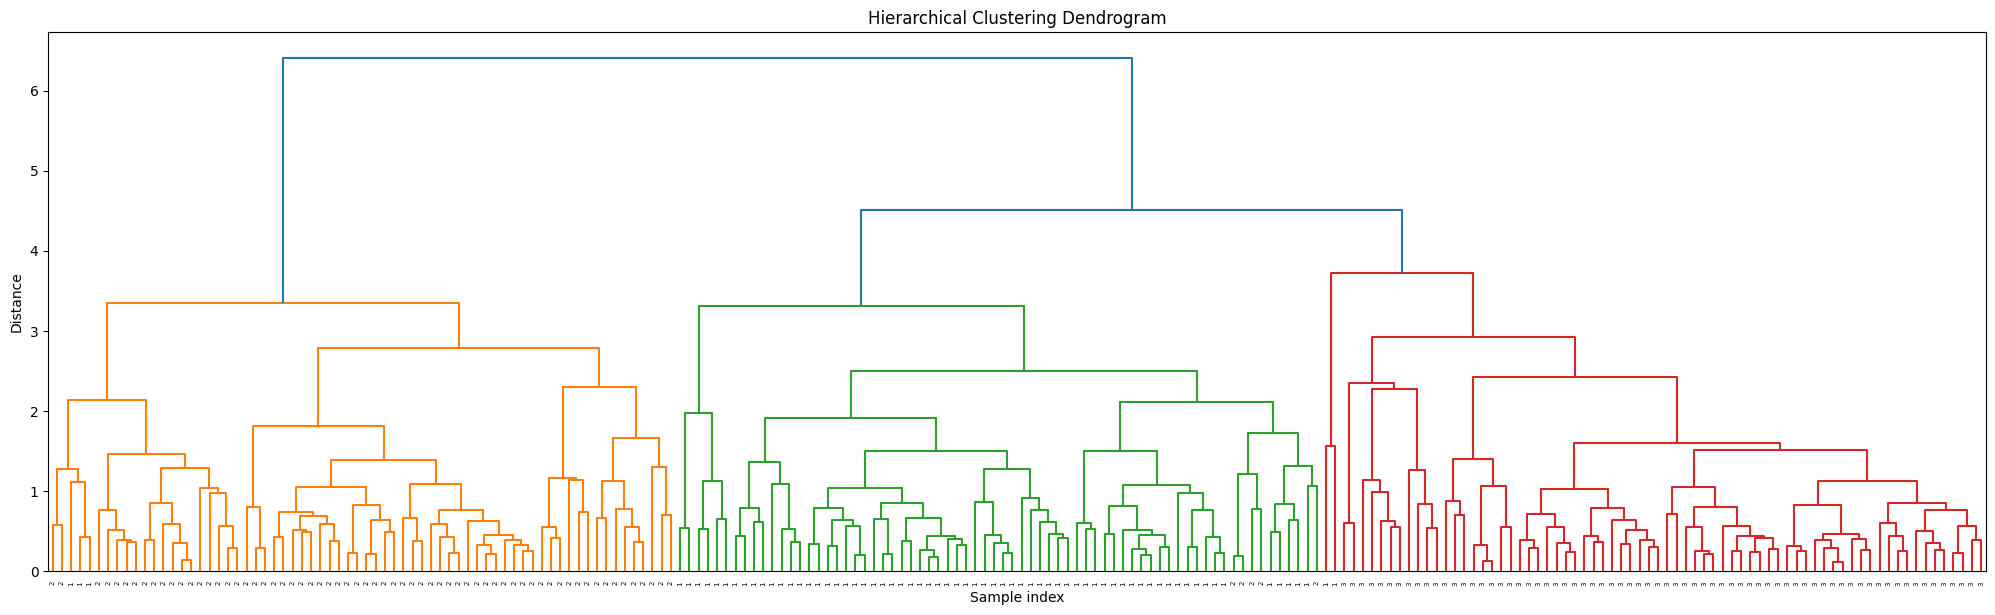

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import rand_score, adjusted_rand_score



# Δημιουργία του δενδρογράμματος
plt.figure(figsize=(25, 7))
plt.title("Hierarchical Clustering Dendrogram")
dend = sch.dendrogram(sch.linkage(seeds_data, method='average'),labels = true_labels)

# Εμφάνιση του δενδρογράμματος
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


Το δενδρόγραμμα μας δείχνει πώς ομαδοποιούνται τα δεδομένα. Έχουμε τρεις μεγάλες κλάσεις, και κάθε μία έχει δικό της χρώμα. Μέσα σε κάθε ομάδα, τα δεδομένα είναι πολύ κοντά το ένα στο άλλο, και αυτό είναι καλό γιατί δείχνει ότι τα δεδομένα που είναι παρόμοια ταξινομούνται μαζί. Όταν βλέπουμε μεγάλες κάθετες γραμμές, αυτό σημαίνει ότι οι ομάδες είναι πιο μακριά η μία από την άλλη.Επίσης, όταν δύο ομάδες είναι παραπλήσιες, ενώνονται κάτω στο διάγραμμα (εμφωλιασμένες).

 Όσο μεγαλώνει η απόσταση , τότε ουσιαστικά παρατηρείται αυτή η συνένωση των υποομάδων. Η τελική μορφή, όταν δηλαδή αυξάνουμε την απόσταση των κλάσεων στο μέγιστο, βλέπουμε δύο μεγάλες κλάσεις, οι οποίες όμως δεν συμπεριλαμβάνουν όλα τα δεδομένα και έχει overlap. Η καλύτερη διαχώριση γίνεται ούτε όταν η απόσταση θεωρείται πολύ μικρή ούτε πολύ μεγάλη, αλλά κάπου στο ενδιάμεσο.

**Γ)**

In [ ]:
# Απομόνωση των χαρακτηριστικών και των ετικετών
# Επιλέγεται το όνομα της τελευταίας στήλης του DataFrame seeds_data με τον δείκτη [-1] και το αφαιρεί από τα χαρακτηριστικά.
features = seeds_data.drop(seeds_data.columns[-1], axis=1)
# Επιλέγεται η τελευταία στήλη του DataFrame, η οποία  περιέχει τις ετικέτες του dataset.
true_labels  = seeds_data[seeds_data.columns[-1]].values
# Εκτέλεση της ιεραρχικής ομαδοποίησης
linked = linkage(features, 'average')

# Χρήση της fcluster για να χωρίσουμε το διάγραμμα και να δημιουργήσουμε 3 ομάδες
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')


# Υπολογισμός των μετρικών εξωτερικής επικύρωσης, ο rand_index έχει ήδη υπολογιστεί πάνω

adjusted_rand_index = adjusted_rand_score(true_labels, kmeans_labels)

# Σύγκριση των μετρικών μεταξύ ιεραρχικής ομαδοποίησης και k-means
hierarchical_rand_index = rand_score(true_labels, hierarchical_labels)
hierarchical_adjusted_rand_index = adjusted_rand_score(true_labels, hierarchical_labels)

# Εμφάνιση των μετρικών εξωτερικής επικύρωσης
print("Rand Index για K-Means clustering:", rand_index)
print("Adjusted Rand Index για K-Means clustering:", adjusted_rand_index)
print("Rand Index για Ιεραρχικό clustering:", hierarchical_rand_index)
print("Adjusted Rand Index για Ιεραρχικό clustering:", hierarchical_adjusted_rand_index)


Rand Index για K-Means clustering: 0.8743677375256322
Adjusted Rand Index για K-Means clustering: 0.7166198557361053
Rand Index για Ιεραρχικό clustering: 0.8864889496468444
Adjusted Rand Index για Ιεραρχικό clustering: 0.7441752360248661


**Rand Index (RI):** Και οι δύο μέθοδοι έχουν υψηλό Rand Index (0.8743 για k-means και 0.8865 για ιεραρχική), και έτσι παρατηρούμε  ότι οι ομάδες που σχηματίζονται ταιριάζουν σε μεγάλο βαθμό με τις πραγματικές ετικέτες. Ο Rand Index μετρά την ποσότητα των αποφάσεων ομαδοποίησης που είναι σωστές.

**Adjusted Rand Index (ARI):** Οι τιμές του Adjusted Rand Index (0.7166 για k-means και 0.7442 για ιεραρχική) είναι επίσης πολύ κοντά, με την τιμή του k-means να είναι λίγο υψηλότερη. Ο ARI είναι μια προσαρμοσμένη εκδοχή του RI για τυχαία ομαδοποίηση, οπότε αποτελεί πιο αξιόπιστο μέτρο της πραγματικής απόδοσης της ομαδοποίησης.

Η σύγκριση των δύο μετρικών υποδεικνύει ότι η ομαδοποίηση με k-means έχει μια οριακά χειρότερη απόδοση στην αντιστοίχιση των πραγματικών ομάδων σε σχέση με την ιεραρχική ομαδοποίηση, αλλά η διαφορά είναι πολύ μικρή. Συνεπώς, και οι δύο μέθοδοι φαίνεται να είναι σχεδόν εξίσου καλές στην  ομαδοποίηση των πραγματικών κλάσεων των δεδομένων. Αυτό μπορεί να σημαίνει ότι για αυτό το συγκεκριμένο dataset, οι within αποστάσεις είναι πιο καλά ορισμένες, καθιστώντας την ομαδοποίηση λιγότερο ευαίσθητη στην επιλεγμένη μέθοδο.

**Δ)**

Οι ιεραρχικές τεχνικές ομαδοποίησης έχουν τα εξής πλεονεκτήματα:

H ιεραρχική ομαδοποίηση παράγει ένα δενδρόγραμμα, το οποίο είναι μια εικόνα που απεικονίζει την ιεραρχία των ομάδων. Αυτό καθιστά την ερμηνευσιμότητα και την οπτική εκπροσώπηση των δεδομένων πιο κατανοητή.

Αντίθετα με την ομαδοποίηση k-means, η ιεραρχική ομαδοποίηση δεν απαιτεί τον αριθμό των ομάδων να οριστεί εκ των προτέρων.

Η ιεραρχική ομαδοποίηση επιτρέπει τη χρήση διαφόρων μέτρων απόστασης, όπως η Ευκλείδεια, η Manhattan, ή άλλες μετρικές, προσαρμόζοντας την ανάλυση στη φύση των δεδομένων.



# **ΑΣΚΗΣΗ 3**

**Α)**
Η PCA είναι μια τεχνική μείωσης διάστασης που χρησιμοποιείται για να μετατρέψει ένα σετ πολλών διαστάσεων σε ένα σετ λιγότερων διαστάσεων, διατηρώντας όσο το δυνατόν περισσότερη πληροφορία.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn import datasets


# Απομόνωση των χαρακτηριστικών και των ετικετών
# Επιλέγεται το όνομα της τελευταίας στήλης του DataFrame seeds_data με τον δείκτη [-1] και το αφαιρεί από τα χαρακτηριστικά.
features = seeds_data.drop(seeds_data.columns[-1], axis=1)


# Εφαρμογή PCA
# Εύρεση ελάχιστων συνιστωσών για 90% variance
pca_1 = PCA(n_components = 0.9, svd_solver = 'full')
pca_features_1 = pca_1.fit(features)

# Εύρεση ελάχιστων συνιστωσών για 99% variance
pca_2 = PCA(n_components = 0.99, svd_solver = 'full')
pca_features_2 = pca_2.fit(features)


print("Ελάχιστες συνιστώσες για 90%: ",len(pca_1.components_))
print("Συγκεκριμένα οι συνιστώσεις είναι (σε αγκύλες είναι οι τιμές των 7 χαρακτηριστικών): ",pca_1.components_)
print("Ελάχιστες συνιστώσες για 99%: ",len(pca_2.components_))
print("Συγκεκριμένα οι συνιστώσεις είναι (σε αγκύλες είναι οι τιμές των 7 χαρακτηριστικών): ",pca_2.components_)

Ελάχιστες συνιστώσες για 90%:  2
Συγκεκριμένα οι συνιστώσεις είναι (σε αγκύλες είναι οι τιμές των 7 χαρακτηριστικών):  [[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]]
Ελάχιστες συνιστώσες για 99%:  2
Συγκεκριμένα οι συνιστώσεις είναι (σε αγκύλες είναι οι τιμές των 7 χαρακτηριστικών):  [[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]]


Τα αποτελέσματα δείχνουν ότι χρειάζονται μόνο 2 από τις κύριες συνιστώσες για να εξηγήσουμε τουλάχιστον το 90% ή ακόμη και το 99% του συνολικού variance του αρχικού dataset. Αυτό σημαίνει ότι με μόνο δύο διαστάσεις,παίρνουμε ένα πολύ καλό αποτύπωμα της δομής και της πληροφορίας που περιέχουν τα αρχικά δεδομένα.

**Β)**

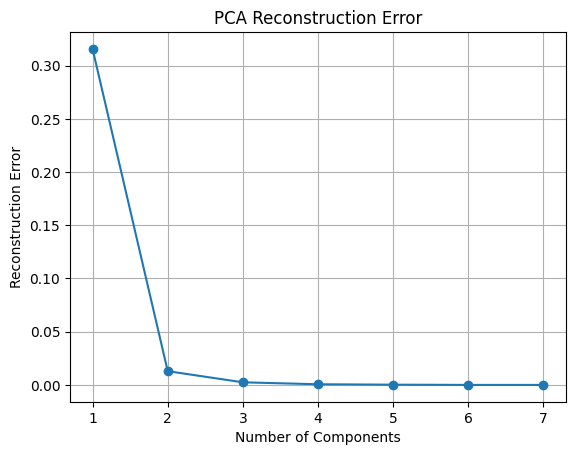

In [ ]:
# Σφάλμα ανακατασκευής
reconstruction_errors = []
for i in range(1, 8):
    pca = PCA(n_components=i)
    reduced_data = pca.fit_transform(features)
    reconstructed_data = pca.inverse_transform(reduced_data)
    error = np.mean(np.square(features.values - reconstructed_data))
    reconstruction_errors.append(error)
# Σχεδιασμός του διαγράμματος σφάλματος ανακατασκευής
plt.plot(range(1, 8), reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('PCA Reconstruction Error')
plt.grid(True)
plt.show()

Με τη χρήση μίας μόνο κύριας συνιστώσας, το σφάλμα ανακατασκευής είναι το μεγαλύτερο, οπότε μια διάσταση δεν είναι αρκετή για να περιγράψει πλήρως την πολυπλοκότητα των δεδομένων.
Καθώς αυξάνεται ο αριθμός των κύριων συνιστωσών, το σφάλμα ανακατασκευής μειώνεται απότομα και η καμπύλη κατεβαίνει  μεταξύ 1 και 3 συνιστωσών.Συνεπώς η προσθήκη αυτών των συνιστωσών βελτιώνει σημαντικά την ποιότητα της ανακατασκευής των δεδομένων.
Μετά τις 3 συνιστώσες, το σφάλμα ανακατασκευής φαίνεται να σταθεροποιείται και οι επιπλέον συνιστώσες προσθέτουν πολύ λίγη πρόσθετη πληροφορία στην ανακατασκευή των δεδομένων. Αυτό σημαίνει ότι η πλειονότητα της πληροφορίας έχει ήδη περιληφθεί και οι επιπλέον διαστάσεις δεν είναι απαραίτητες για να περιγράψουν την δομή των δεδομένων.
Το διάγραμμα δείχνει ότι ένα μικρός αριθμός κύριων συνιστωσών μπορεί να παρέχει μια καλή ανακατασκευή των αρχικών δεδομένων με ελάχιστο σφάλμα, κάτι που είναι καίριας σημασίας στη μείωση των διαστάσεων και στην εξαγωγή εισόδου για άλλες αναλυτικές τεχνικές.

**Γ)**


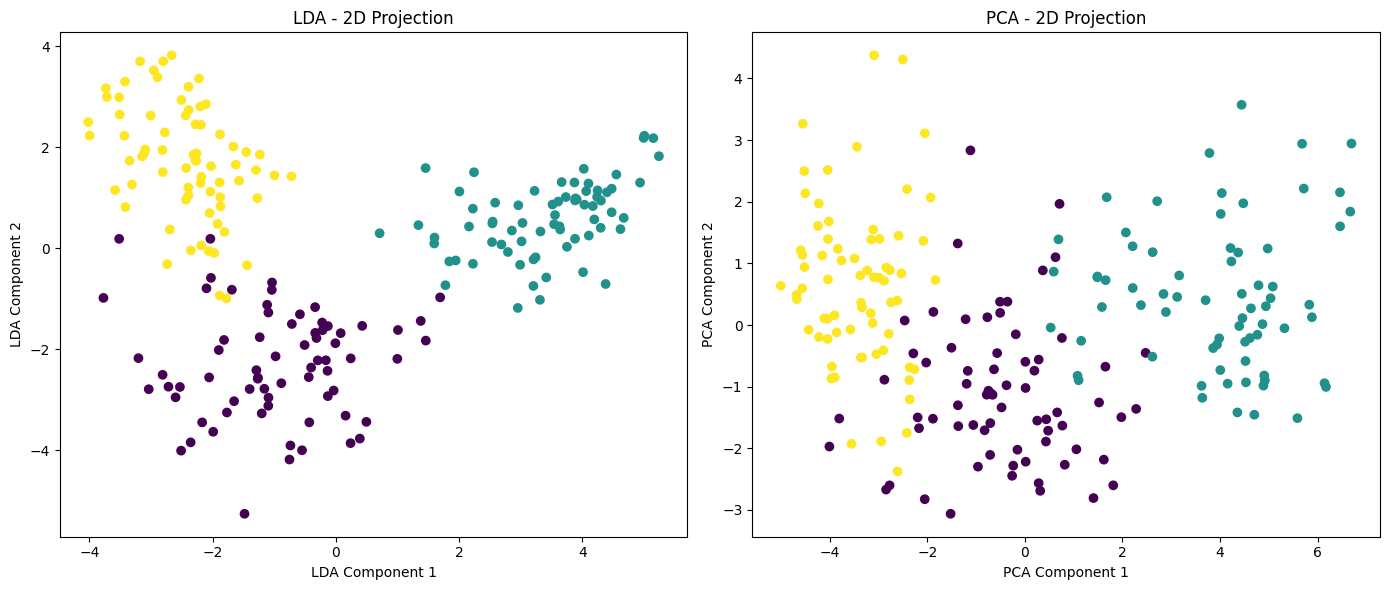

In [ ]:
# Εφαρμογή LDA για απεικόνιση σε 2 διαστάσεις
lda = LDA(n_components=2)
# Πίνακας προβολής
lda_features = lda.fit_transform(features, true_labels)

# Εφαρμογή PCA για απεικόνιση σε 2 διαστάσεις
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Δημιουργία διαγραμμάτων για σύγκριση
plt.figure(figsize=(14, 6))

# LDA 2D Απεικόνιση
plt.subplot(1, 2, 1)
plt.scatter(lda_features[:, 0], lda_features[:, 1], c=labels)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA - 2D Projection')

# PCA 2D Απεικόνιση
plt.subplot(1, 2, 2)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - 2D Projection')

plt.tight_layout()
plt.show()


 Η LDA απεικόνιση διαχωρίζει καλύτερα τις κλάσεις, οι οποίες φαίνονται με τα διαφορετικά χρώματα.

Στην PCA απεικόνιση, οι κλάσεις δεν φαίνεται να είναι τόσο καθαρά διαχωρισμένες. Η PCA επικεντρώνεται στη διατήρηση της μέγιστης διακύμανσης και δεν λαμβάνει υπόψη την κατηγοριοποίηση των δεδομένων, πράγμα που σημαίνει ότι η απεικόνιση είναι περισσότερο γενική και δεν είναι εξασφαλισμένη η διακριτικότητα των κλάσεων.

Αν συγκρίνουμε τις δύο μεθόδους, η LDA είναι πιο κατάλληλη για ταξινομημένα σύνολα δεδομένων, ενώ η PCA είναι πιο κατάλληλη για την εξαγωγή της κύριας δομής των δεδομένων χωρίς τις ετικέτες των κλάσεων.

**Δ)**

Ο πίνακας προβολής περιλαμβάνει τις δύο συνιστώσες που προέκυψαν από την LDA, δηλαδή τις κατευθύνσεις στο πολυδιάστατο χώρο που μεγιστοποιούν τη διαφοροποίηση μεταξύ των κλάσεων. Ο πίνακας lda_features περιέχει τις προβολές των αρχικών δεδομένων σε αυτές τις δύο διαστάσεις. Τα πιο σημαντικά χαρακτηριστικά είναι στην αρχή του πίνακα προβολής, ενώ τα λιγότερα στο τέλος.

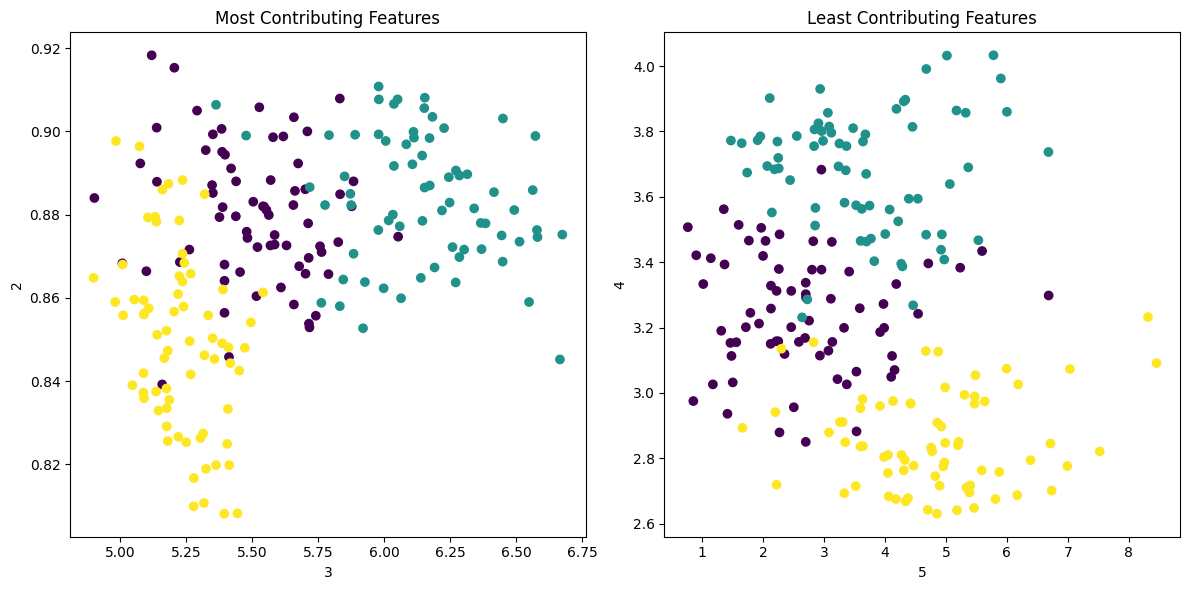

In [ ]:
# Εύρεση συνεισφοράς χαρακτηριστικών στη LDA
# Απόλυτες τιμές των συντελεστών σημαντικότητα των χαρακτηριστικών για την διάκριση μεταξύ αυτών των δύο κλάσεων.
lda_contributions = np.abs(lda.coef_[0])

# Τα δύο χαρακτηριστικά που συνεισφέρουν περισσότερο
most_contributing_features_indices = np.argsort(lda_contributions)[-2:]

# Τα δύο χαρακτηριστικά που συνεισφέρουν λιγότερο
least_contributing_features_indices = np.argsort(lda_contributions)[:2]

most_contributing_features = features.columns[most_contributing_features_indices]
least_contributing_features = features.columns[least_contributing_features_indices]

# Δημιουργία δισδιάστατων απεικονίσεων
plt.figure(figsize=(12, 6))

# Χρησιμοποιώντας τα δύο περισσότερο συνεισφέροντα χαρακτηριστικά
plt.subplot(1, 2, 1)
plt.scatter(features[most_contributing_features[0]],features[most_contributing_features[1]],c=labels)
plt.xlabel(most_contributing_features[0])
plt.ylabel(most_contributing_features[1])
plt.title('Most Contributing Features')

# Χρησιμοποιώντας τα δύο λιγότερο συνεισφέροντα χαρακτηριστικά
plt.subplot(1, 2, 2)
plt.scatter(features[least_contributing_features[0]],features[least_contributing_features[1]],c=labels)
plt.xlabel(least_contributing_features[0])
plt.ylabel(least_contributing_features[1])
plt.title('Least Contributing Features')

plt.tight_layout()
plt.show()


 Στην πρώτη απεικόνιση, χρησιμοποιήθηκαν τα δύο χαρακτηριστικά που συνεισφέρουν περισσότερο στη διάκριση μεταξύ των κλάσεων σύμφωνα με το μοντέλο LDA, ενώ στη δεύτερη απεικόνιση, τα δύο χαρακτηριστικά που συνεισφέρουν το λιγότερο.

 Τα δύο διαγράμματα που παρουσιάζονται απεικονίζουν τα δεδομένα χρησιμοποιώντας δύο διαφορετικά ζευγάρια χαρακτηριστικών που έχουν προκύψει από την ανάλυση LDA. Το πρώτο διάγραμμα (αριστερά) απεικονίζει τα δεδομένα με βάση τα δύο χαρακτηριστικά που συνεισφέρουν περισσότερο στη διαχωριστική ικανότητα του LDA μοντέλου, ενώ το δεύτερο διάγραμμα (δεξιά) χρησιμοποιεί τα δύο λιγότερο συνεισφέροντα χαρακτηριστικά.

Στο διάγραμμα με τα περισσότερο συνεισφέροντα χαρακτηριστικά, βλέπουμε ότι η κατανομή των δεδομένων φαίνεται να έχει κάποια διαχωριστική τάση, με τα σημεία να σχηματίζουν σχετικά διακριτές ομάδες βάση χρώματος. Αυτό σημαίνει ότι τα δύο αυτά χαρακτηριστικά  διακρίνουν αποτελεσματικά τις κλάσεις των δεδομένων.

Αντίθετα, στο διάγραμμα με τα λιγότερο συνεισφέροντα χαρακτηριστικά, οι κλάσεις δεν διαχωρίζονται τόσο ξεκάθαρα και τα σημεία φαίνεται να είναι πιο ανακατεμένα. Αυτό σημαίνει ότι αυτά τα χαρακτηριστικά δυσκολεύονται στον διαχωρισμό των κλάσεων.

Συνοψίζοντας τα διαγράμματα επιβεβαιώνουν τη σημασία της επιλογής σωστών χαρακτηριστικών όταν πρόκειται για την απεικόνιση και την κατανόηση των διαφορών μεταξύ κλάσεων σε ένα σύνολο δεδομένων. Τα διαγράμματα δείχνουν επίσης πώς η LDA μπορεί να αναδείξει τις διαφορές μεταξύ των κλάσεων ειδικά με τη χρήση χαρακτηριστικών που συνεισφέρουν περισσότερο στη διάκριση των κλάσεων.

# **ΆΣΚΗΣΗ 4**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Α)**
Ο κύριος στόχος του classical MDS είναι να αναπαραστήσει δεδομένα υψηλής διάστασης σε έναν χώρο χαμηλότερης διάστασης (συνήθως 2D ή 3D) με τέτοιον τρόπο ώστε οι αποστάσεις μεταξύ των σημείων στον χώρο χαμηλότερης διάστασης να αντανακλούν τις αποστάσεις μεταξύ των σημείων στον αρχικό χώρο υψηλής διάστασης όσο το δυνατόν πιο στενά.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS


# Φόρτωση του dataset
file_path_1 = '/content/drive/MyDrive/ergasia3protupa/Distance_Matrix_world.txt'
file_path_2 = '/content/drive/MyDrive/ergasia3protupa/City_names_world.txt'
file_path_3 = '/content/drive/MyDrive/ergasia3protupa/Distance_Matrix_US.txt'
file_path_4 = '/content/drive/MyDrive/ergasia3protupa/City_names_US.txt'

distance_matrix_world = pd.read_csv(file_path_1, delim_whitespace=True, header=None)
city_names_world = pd.read_csv(file_path_2, delim_whitespace=True, header=None)
distance_matrix_us = pd.read_csv(file_path_3, delim_whitespace=True, header=None)
city_names_us = pd.read_csv(file_path_4, header=None)


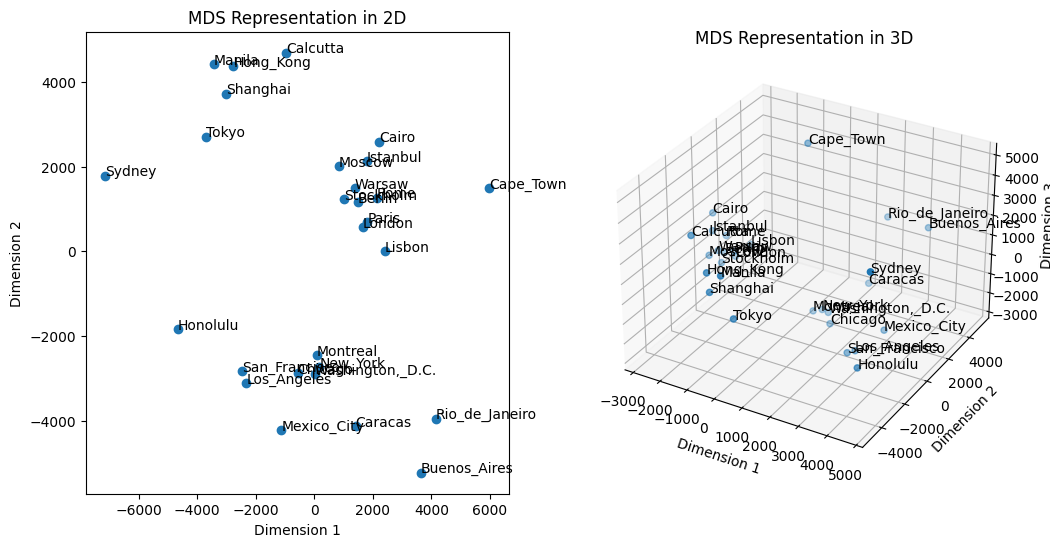

In [ ]:
# Εφαρμογή MDS για δύο διαστάσεις στον παγκόσμιο πίνακα αποστάσεων
# Βάζουμε dissimilarity='precomputed',ώστε να έχουμε τον classical MDS
mds_2d = MDS(n_components=2, dissimilarity='precomputed',normalized_stress=False, random_state=42)
# Η Κλασική MDS ξεκινά με έναν πίνακα αποστάσεων, ο οποίος είναι ένας τετραγωνικός πίνακας που δείχνει
# τις αποστάσεις μεταξύ ζευγών αντικειμένων στο σετ δεδομένων.
world_cities_2d = mds_2d.fit_transform(distance_matrix_world)

# Εφαρμογή MDS για τρεις διαστάσεις στον παγκόσμιο πίνακα αποστάσεων
mds_3d = MDS(n_components=3, dissimilarity='precomputed',normalized_stress=False, random_state=42,)
world_cities_3d = mds_3d.fit_transform(distance_matrix_world)

# Απεικόνιση των 2d αναπαραστάσεων των πόλεων
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(world_cities_2d[:, 0], world_cities_2d[:, 1])

# Απεικόνιση ονομάτων των πόλεων στη 2d αναπαραστάση των πόλεων
for i, city in enumerate(city_names_world[0]):
    plt.annotate(city, (world_cities_2d[i, 0], world_cities_2d[i, 1]))

plt.title('MDS Representation in 2D')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Απεικόνιση των 3d αναπαραστάσεων των πόλεων
ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(world_cities_3d[:, 0], world_cities_3d[:, 1], world_cities_3d[:, 2])

# Απεικόνιση ονομάτων των πόλεων στη 3d αναπαραστάση των πόλεων
for i, city in enumerate(city_names_world[0]):
    ax.text(world_cities_3d[i, 0], world_cities_3d[i, 1], world_cities_3d[i, 2], city)

ax.set_title('MDS Representation in 3D')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.show()

Η μέθοδος classical Multidimensional Scaling (MDS) χρησιμοποιείται για τη δημιουργία διανυσματικών αναπαραστάσεων πόλεων με βάση τις αποστάσεις μεταξύ τους. Στο πρώτο διάγραμμα, παρουσιάζεται η αναπαράσταση των πόλεων σε δύο διαστάσεις, ενώ στο δεύτερο διάγραμμα παρουσιάζεται σε τρεις διαστάσεις.

Στο πρώτο διάγραμμα των δύο διαστάσεων, μπορούμε να δούμε τη σχετική απόσταση μεταξύ των πόλεων σε ένα επίπεδο. Παρατηρούμε ότι πόλεις που βρίσκονται κοντά στο διάγραμμα έχουν κοντινές αποστάσεις μεταξύ τους, ενώ πόλεις που βρίσκονται μακριά στο διάγραμμα έχουν μεγαλύτερες αποστάσεις. Αυτό αντικατοπτρίζει τη γεωγραφική κατανομή των πόλεων.

Στο δεύτερο διάγραμμα των τριών διαστάσεων, παρουσιάζεται μια πιο πλήρης αναπαράσταση των πόλεων. Η τρίτη διάσταση προσθέτει περισσότερες πληροφορίες για την απόσταση μεταξύ των πόλεων σε σχέση με το πρώτο διάγραμμα.

Συνολικά, το MDS μας παρέχει μια απεικόνιση των πόλεων που λαμβάνει υπόψη τις αποστάσεις μεταξύ τους και μας επιτρέπει να δούμε πώς αυτές οι αποστάσεις αντιστοιχούν σε έναν πολυδιάστατο χώρο. Αυτό μπορεί να βοηθήσει στην αντίληψη των σχέσεων μεταξύ των πόλεων και στην εξαγωγή γεωγραφικών διακυμάνσεων.

**Β)**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


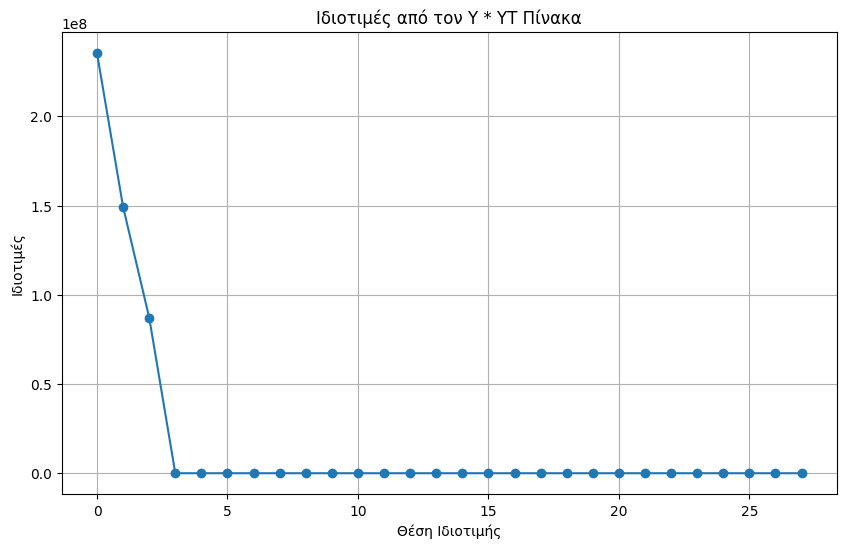

3

In [ ]:

# Εφαρμογή MDS για το μέγιστο αριθμό διαστάσεων που επιτρέπει ο αλγόριθμος
# Σε αυτή την περίπτωση, θα είναι N-1, όπου N είναι ο αριθμός των πόλεων
max_dims = distance_matrix_world.shape[0] - 1

# Υλοποίηση του MDS
mds = MDS(n_components=max_dims, dissimilarity='precomputed', random_state=42)
world_cities_max_dims = mds.fit_transform(distance_matrix_world)

# Υπολογισμός του πίνακα Y * YT, στον οποίο υπολογίζεται το γινόμενο του πίνακα των συντεταγμένων MDS Y επί τον ανάστροφό του YT.
# Αυτό δημιουργεί έναν νέο πίνακα που δείχνει τις σχέσεις μεταξύ των σημείων στον πολυδιάστατο χώρο.
Y_YT_matrix = np.dot(world_cities_max_dims, world_cities_max_dims.T)

# Υπολογισμός των ιδιοτιμών του πίνακα Y * YT ,οι οποίες μας δείχνουν πόση πληροφορία μπορούμε να πάρουμε από κάθε διάσταση
# για το πώς είναι διατεταγμένες οι πόλεις μεταξύ τους σε έναν πολυδιάστατο χώρο.
eigenvalues = np.linalg.eigvals(Y_YT_matrix)

# Ταξινόμηση των ιδιοτιμών σε φθίνουσα σειρά, έτσι ώστε μετά να πάρουμε τις πιο σημαντικές.
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Δημιουργία διαγράμματος των ιδιοτιμών
plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues, marker='o')
plt.title('Ιδιοτιμές από τον Y * YT Πίνακα')
plt.xlabel('Θέση Ιδιοτιμής')
plt.ylabel('Ιδιοτιμές')
plt.grid(True)
plt.show()

significant_eigenvalues = []
# Επιλογή του threshold που βόλεψε στη συγκεκριμένη υλοποίηση, ώστε να ταιριάζει το αποτελέσμα με αυτό που φαίνεται από το διάγραμμα με το μάτι.
threshold = np.mean(sorted_eigenvalues)
# Φιλτράρισμα των ιδιοτιμών που είναι μεγαλύτερες από το threshold
for i in sorted_eigenvalues:
    if (i > threshold):
        significant_eigenvalues.append(i)

# Επιστροφή του αριθμού των σημαντικών ιδιοτιμών
num_significant_eigenvalues = len(significant_eigenvalues)
num_significant_eigenvalues


Το διάγραμμα των ιδιοτιμών που δημιουργήσαμε δείχνει τις τιμές των ιδιοτιμών του πίνακα Y⋅Y^T σε φθίνουσα σειρά. Από το διάγραμμα, μπορούμε να δούμε ότι υπάρχουν 3 ιδιοτιμές που είναι μεγαλύτερες από 1*10^8, οι οποίες μπορεί να θεωρηθούν ως σημαντικές.

Σε γενικές γραμμές, οι ιδιοτιμές που είναι σχετικά μεγάλες αντιπροσωπεύουν τις διαστάσεις με την περισσότερη πληροφορία. Έτσι, μπορεί να θεωρηθεί ότι οι βέλτιστες διαστάσεις για την αναπαράσταση των δεδομένων είναι οι διαστάσεις που αντιστοιχούν στις σημαντικές ιδιοτιμές. Σε αυτή την περίπτωση, μπορούμε να κρατήσουμε 3 διαστάσεις για να απεικονίσουμε πιστά τη δομή των δεδομένων. ​​

**BONUS**

In [ ]:
#Εμφάνιση ιδιοτιμών του διαγράμματος με τις 3 ιδιοτιμές ως πιο σημαντικές.
sorted_eigenvalues

array([2.35339841e+08, 1.49210134e+08, 8.72224609e+07, 6.72240310e+02,
       2.17409852e+02, 2.02767900e+02, 1.51762525e+02, 6.55920982e+01,
       5.76141486e+01, 3.35345594e+01, 2.62411263e+01, 1.44597209e+01,
       1.21753357e+01, 1.02553005e+01, 9.64205152e+00, 6.86857780e+00,
       5.46664945e+00, 5.09531720e+00, 3.32825267e+00, 2.30234461e+00,
       1.00289020e+00, 7.27319929e-01, 6.03930660e-01, 3.66155673e-01,
       9.92489555e-02, 4.60578565e-02, 4.43765493e-03, 4.16079611e-09])


Επειδή τα δεδομένα έχουν πολυπλοκότητα που δεν μπορεί να αποδοθεί πλήρως σε τρεις διαστάσεις, οι πρόσθετες μη μηδενικές ιδιοτιμές δίνουν τις επιπλέον διαστάσεις που απαιτούνται για να απεικονίσουν ακριβώς την πολυδιάστατη δομή των αποστάσεων. Αυτό σημαίνει ότι οι μη μηδενικές ιδιοτιμές προσφέρουν πληροφορίες για τις επιπλέον διαστάσεις που χρειάζονται για να αναπαρασταθούν με περισσότερη ακρίβεια τα δεδομένα.

Για παράδειγμα, ένας λόγος είναι οι ανακρίβειες στις μετρήσεις των αποστάσεων. Αν παρατηρήσουμε τα διαγράμματα που δείχνουν τη τοπολογία των πόλεων οι δύο διαστάσεις προφανώς και δεν είναι αρκετές, καθώς οι αποστάσεις δεν είναι ευκλείδειες. Οι τρεις διαστάσεις είναι οι πιο σημαντικές, όπως συμπεράναμε και από το διάγραμμα ιδιοτιμών, επείδη οι αποστάσεις είναι σφαιρικές και αυτός ο τρόπος αναπαραριστά καλύτερα το πρόβλημα της απεικόνησης των πόλεων. Όμως, στη πραγματικότητα οι πόλεις απέχουν μεταξύ τους με βάση τη γεωδετική τους απόσταση, την πληροφορία την ενισχύουν οι έξτρα μη μηδενικές ιδιοτιμές. Μπορεί αυτές οι ιδιοτιμές να μην αναφέρονται μόνο στην προσθήκη πληροφορίας στην απόσταση των πόλεων, αλλά και σε άλλα χαρακτηριστικά των πόλεων που θα βοηθούσαν στην καλύτερη και πιο ακριβή απεικόνιση της θέσης τους, πχ εισόδημα πολιτών, κλίμα.



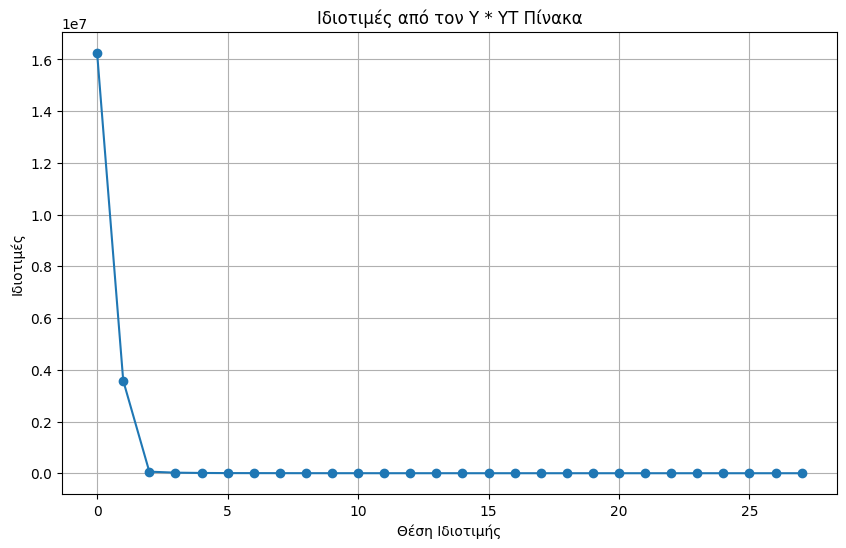

2

In [ ]:
# Εφαρμογή MDS για το μέγιστο αριθμό διαστάσεων που επιτρέπει ο αλγόριθμος  για τις πόλεις US
max_dims_us = distance_matrix_us.shape[0] - 1
mds_us = MDS(n_components=max_dims_us, dissimilarity='precomputed',normalized_stress=False, random_state=42)
us_cities_max_dims = mds_us.fit_transform(distance_matrix_us)

# Υπολογισμός του πίνακα Y * YT για US
Y_YT_matrix_us = np.dot(us_cities_max_dims, us_cities_max_dims.T)

# Υπολογισμός των ιδιοτιμών του πίνακα Y * YT για  US
eigenvalues_us = np.linalg.eigvals(Y_YT_matrix_us)

# Ταξινόμηση των ιδιοτιμών σε φθίνουσα σειρά για US
sorted_eigenvalues_us = np.sort(eigenvalues_us)[::-1]

# Δημιουργία διαγράμματος των ιδιοτιμών για US
plt.figure(figsize=(10, 6))
plt.plot(sorted_eigenvalues_us, marker='o')
plt.title('Ιδιοτιμές από τον Y * YT Πίνακα')
plt.xlabel('Θέση Ιδιοτιμής')
plt.ylabel('Ιδιοτιμές')
plt.grid(True)
plt.show()

significant_eigenvalues_us = []
threshold_us = np.mean(sorted_eigenvalues_us)
# Φιλτράρισμα των ιδιοτιμών που είναι μεγαλύτερες από το threshold
for i in sorted_eigenvalues_us:
    if (i > threshold_us):
        significant_eigenvalues_us.append(i)

# Επιστροφή του αριθμού των σημαντικών ιδιοτιμών
num_significant_eigenvalues_us = len(significant_eigenvalues_us)
num_significant_eigenvalues_us


Μπορούμε να παρατηρήσουμε ότι οι δύο πρώτες ιδιοτιμές είναι και οι πιο σημαντικές. Με βάση αυτών μπορούμε να αναπαραστήσουμε τα δεδομένα. Οι υπόλοιπες ιδιοτιμές δεν θα δίνουν κάποια επιπλέον πληροφορία που θα άλλαζε το τελικό αποτέλεσμα.



Στη συγκεκριμένη υλοποίηση, ο λόγος που το πλήθος των πιο σημαντικών ιδιοτιμών είναι μικρότερος είναι διότι πλέον οι πόλεις είναι φυσικά πιο κοντά, ανήκουν στην ίδια ήπειρο, σε αντίθεση με πριν που ανήκαν σε όλο το κόσμο. Έτσι, η αναπαράσταση τους είναι λιγότερο πολύπλοκη και άρα χρειάζονται λιγότερες πληροφορίες και άρα ιδιοτιμές.